In [1]:
import pandas as  pd

In [2]:
df=pd.read_csv("addhar_centers.csv")
df['lat']=df['lat'].astype(float)
df['long']=df['long'].astype(float)

In [4]:
print(type(df['lat'][0]))

<class 'numpy.float64'>


In [5]:
data=pd.read_csv("addhar_centers.csv")
print(type(df['lat'][0]))

<class 'numpy.float64'>


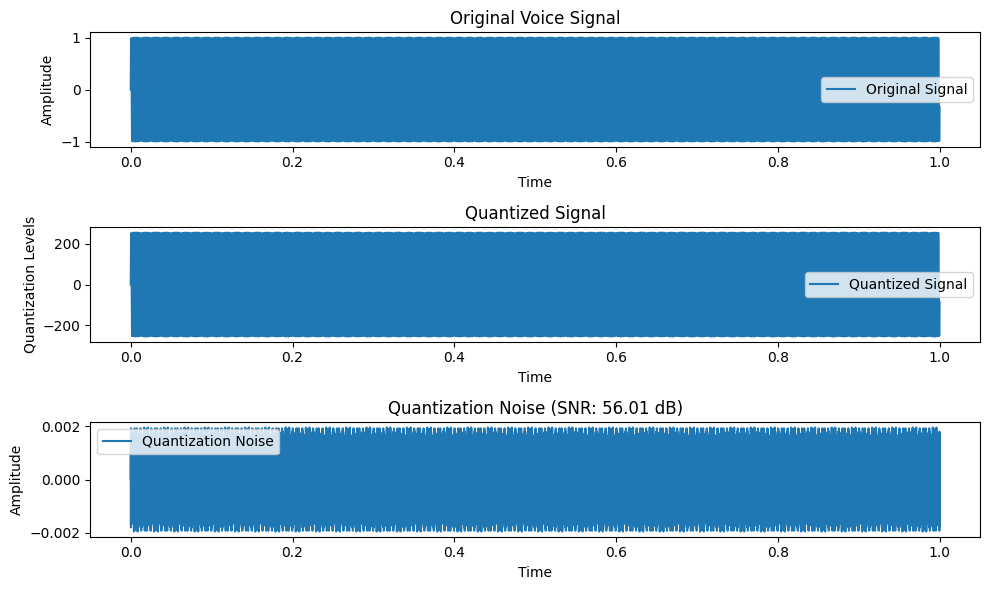

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def encode_pcm(signal, quantization_levels):
    # Normalize signal to the range [-1, 1]
    normalized_signal = signal / max(np.abs(signal))

    # Quantization
    quantized_signal = np.round(normalized_signal * (quantization_levels - 1))

    return quantized_signal

def decode_pcm(quantized_signal, quantization_levels):
    # Dequantization
    reconstructed_signal = quantized_signal / (quantization_levels - 1)

    return reconstructed_signal

def calculate_snr(original_signal, noisy_signal):
    signal_power = np.sum(original_signal**2)
    noise_power = np.sum((original_signal - noisy_signal)**2)
    snr = 10 * np.log10(signal_power / noise_power)

    return snr

# Simulate a simple voice signal
fs = 8000  # Sample rate
t = np.arange(0, 1, 1/fs)
voice_signal = np.sin(2 * np.pi * 440 * t)  # A 440 Hz sine wave as a basic example

# PCM parameters
quantization_levels = 256

# Encode and decode PCM
quantized_signal = encode_pcm(voice_signal, quantization_levels)
reconstructed_signal = decode_pcm(quantized_signal, quantization_levels)

# Simulate quantization noise
quantization_noise = voice_signal - reconstructed_signal

# Calculate SNR
snr = calculate_snr(voice_signal, reconstructed_signal)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, voice_signal, label='Original Signal')
plt.title('Original Voice Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, quantized_signal, label='Quantized Signal')
plt.title('Quantized Signal')
plt.xlabel('Time')
plt.ylabel('Quantization Levels')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, quantization_noise, label='Quantization Noise')
plt.title(f'Quantization Noise (SNR: {snr:.2f} dB)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

In [1]:
!pip install plotly

^C


In [3]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def encode_pcm(signal, quantization_levels):
    normalized_signal = signal / max(np.abs(signal))
    quantized_signal = np.round(normalized_signal * (quantization_levels - 1))
    return quantized_signal

def decode_pcm(quantized_signal, quantization_levels):
    reconstructed_signal = quantized_signal / (quantization_levels - 1)
    return reconstructed_signal

def calculate_snr(original_signal, noisy_signal):
    signal_power = np.sum(original_signal**2)
    noise_power = np.sum((original_signal - noisy_signal)**2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

# Simulate a simple voice signal
fs = 80
t = np.arange(0, 1, 1/fs)
voice_signal = np.sin(2 * np.pi * 440 * t)

# PCM parameters
quantization_levels = 256

# Encode and decode PCM
quantized_signal = encode_pcm(voice_signal, quantization_levels)
reconstructed_signal = decode_pcm(quantized_signal, quantization_levels)

# Simulate quantization noise
quantization_noise = voice_signal - reconstructed_signal

# Calculate SNR
snr = calculate_snr(voice_signal, reconstructed_signal)

# Create interactive subplots
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Original Voice Signal', 'Quantized Signal', 'Quantization Noise'))

# Original Voice Signal
fig.add_trace(go.Scatter(x=t, y=voice_signal, mode='lines', name='Original Signal'), row=1, col=1)

# Quantized Signal
fig.add_trace(go.Scatter(x=t, y=quantized_signal, mode='lines', name='Quantized Signal'), row=2, col=1)

# Quantization Noise
fig.add_trace(go.Scatter(x=t, y=quantization_noise, mode='lines', name='Quantization Noise'), row=3, col=1)

# Update layout
fig.update_layout(title=f'Quantization Noise (SNR: {snr:.2f} dB)', xaxis_title='Time', height=800, width=800)

# Show interactive plot
fig.show()